In [8]:
!pip install mkwikidata
!pip install matplotlib

You should consider upgrading via the '/Users/pavelerokhin/pavel/sparql/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/pavelerokhin/pavel/sparql/venv/bin/python -m pip install --upgrade pip' command.


In [9]:
import mkwikidata
import pandas as pd

In [10]:
query = """
SELECT DISTINCT ?cityLabel ?population ?gps
WHERE
{
  ?city wdt:P31/wdt:P279* wd:Q515 .
  ?city wdt:P1082 ?population .
  ?city wdt:P625 ?gps .
  SERVICE wikibase:label {
    bd:serviceParam wikibase:language "en" .
  }
}
ORDER BY DESC(?population) LIMIT 100
"""

In [11]:
query_result = mkwikidata.run_query(query, params={ })

In [12]:
data = [{"name" : x["cityLabel"]["value"], "population" : int(x["population"]["value"])} for x in query_result["results"]["bindings"]]

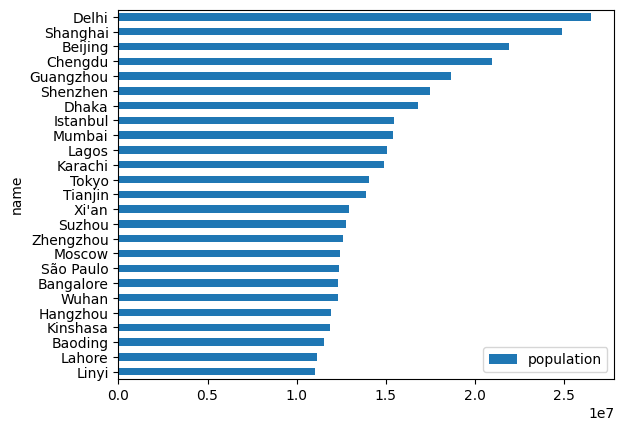

In [15]:
pd.DataFrame(data).set_index("name").head(25).plot.barh().invert_yaxis()